In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Movie Recommender System Solution

© Explore Data Science Academy

### © ALPHA Analytics

<div align="center" style="width: 800px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://images-platform.99static.com//MQcrc1HH55wDFaWPoeokJoIO8SQ=/9x0:809x800/fit-in/500x500/projects-files/54/5432/543273/7ca7f142-502c-4133-b8ab-680f0a4f2bf6.jpg"
     alt="Content-based Filtering"
     style="float: center; padding-bottom=0.5em"
     width=200px/>  
</div>

The members of **2207ACDS TEAM CW1**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

### COLLABORATORS
- ⚡ Egah Francis - **Team Lead**
- ⚡ Olisa Clement  - **Machine Learning Engineer**
- ⚡ Karabo Molema  - **Data Engineer**
- ⚡ Abdulrasheed Musa - **Data Scientist**
- ⚡ Sibisiso Mashabela - **Data Analyst**
- ⚡ Ifeoma Obi - **Business Analyst**
- ⚡ Emmanuel Oraegbu - **Strategy Manager**

### Predict Overview: EDSA - Movie Recommendation System

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options. Ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you?. It's not just a guess drawn out of the hat. There is an algorithm behind it.

With this context, **Alpha Analytics** has been awarded a contract to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.



### Value Chain

**Product:** Alpha Analytics aims to develop a machine learning model that can accurately predict the ratings a user will give to a movie, this model will be integrated into a web application where list of movies will be recommended to users based on their historical preferences.

**People:** Alpha Analytics have put up a quality team that is capable of bringing the project to completion. With all team members being an expert in their respective roles.

**Process:** The process to achieving the gol of Alpha Analytics is very simple. First the team acquires the relevant and representative dataset, and then this raw data is fed into the developed recommender system which now generates movie recommendations to users.
<br></br>

<div align="center" style="width: 700px; font-size: 80%; text-align: center; margin-left: 80px">
<img src="https://www.shutterstock.com/image-vector/recommender-system-provides-smart-recommendations-260nw-1978170500.jpg"
     alt="Collaborative-based Filtering - Utility Matrix"
     style="float: center; padding-bottom=0.5em"
     width=400px/>
</div>



### Data

This dataset consists of several million 5-star ratings obtained from users of the online [MovieLens](https://movielens.org/) movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

The data for the MovieLens dataset is maintained by the [GroupLens](https://grouplens.org/) research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from [IMDB](https://www.imdb.com/)

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Wrangling </a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Cleaning and Preprocessing </a>

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Model Development</a>

<a href=#eight>8. Model Performance</a>

<a href=#nine>9. Model Explanations</a>

<a href=#ten>10. Conclusion</a>

In [70]:
# !pip install comet_ml

In [71]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="gRihDKlpgEFAdHQZOFrt4GUMj",
    project_name="movie-recommendation-system",
    workspace="olisa-clement",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using Experiment.log_metrics() and Experiment.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/kaggle/working' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/olisa-clement/movie-recommendation-system/d1c77fb88f5e4401a6511c103162f2f7



 <a id="one"></a>
## 1. Import Libraries
<a href=#cont>Back to Table of Contents</a>

In [1]:
# Libraries for data preprocessing and manipulations
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
sns.set()

# Libraries for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Libraries for model development
from surprise import SVD
from surprise import SVDpp
from surprise import CoClustering
from surprise import SlopeOne
from surprise import NMF
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
import heapq

# Metrics
from surprise import accuracy

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Load Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Four data set will be used for this project.
- Imdb_data: This data contains information about each movie cast, director, plot keyword, and budget
- movies: This data contains information about the movie title and genre
- train: The train data contains information about the users, movies watched by each user and the ratings of each movie by the user
- test: The test data contains the userId and movieId for which ratings are to be predicted,

In [2]:
# Load the Imdb data
df_imdb = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')
# Load the movies data
df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')
# Load the train data
df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')
# Load the test data
df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')

<a id="three"></a>
## 3. Data Wrangling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, the team will familiarize with the data to answer the following questios:
- where the data properly loaded and are of the right structure?
- What are the data types of each column and how much memory is consumed by each data?
- Are there missing values?

In [3]:
# View the top five content of the train data
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [4]:
# Check the dtypes of each features and memory consumed
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


As clearly seen above,there are over 10M rows of data and the file size is quite large. These may become an issue if not dealt wit. Also, the numeric data types are of 64 bits and this could have contributed to the large file size.

In [5]:
# Check for missing values by combining the isnull() and sum() functions
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

There are no missing values in any of the columns in the train data

In [6]:
# View the top five content of the imdb data
df_imdb.tail()

,movieId,title_cast,director,runtime,budget,plot_keywords
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant
27277,131262,Sophie Lane Curtis|Kelly Reilly|Graham Phillip...,Hilary Brougher,96.0,NaN,hex|witch|virgin|blood


In [7]:
# Check the dtypes of each features and memory consumed
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


Over 27K movies info with some columns having missing data. The numeric dtypes are of 64 bits and the file size is around 1.2MB

In [8]:
# Check for missing value counts for each column
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [9]:
# View the top 5 content of the movies data
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [10]:
# Check the dtypes of each features and memory consumed
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


64 bit numeric dtype, seems to have no missing value with a disk space of 1.4MB.

In [11]:
# Check for missing values for each column
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [12]:
# View the top 5 content of the test data
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [13]:
# Check the dtypes of each features and memory consumed
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


64 bit numeric data type and a file size of 76MB.

#### Observations from the wrangled data

Observations from wrangling data are as follows:
- The file size of each data set is significantly large and this may break the team's code. Downcasting and other memory utilization process should be considered.
- Information needed for the project are scattered acroos different data sets. A master data set containing all needed information should be created.
- There missing values in the Imdb data.
- Some columns in the data sets contains multiple info separated by a pipe(|).
- Some movies in the movies dataset do not have genre in the movie data
- Release year of each movie is attached to the movie title

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, further exploration will be performed to understand the content of the data available.

Given the large file size, individual preparation on each dataset has to be perfomed before merging for proper exploration so as to utilize memory.

In [14]:
# Create a copy of the imdb and movies datasets
df_imdb_expl = df_imdb.copy()
df_movies_expl = df_movies.copy()

# Replace missing values so as to avoid breaking the code when applying the split() method
df_imdb_expl[['title_cast','plot_keywords']] = df_imdb_expl[['title_cast','plot_keywords']].fillna('')
# Group the genres in a list
df_movies_expl['genres'] = df_movies_expl['genres'].apply(lambda x: x.split("|"))
# Group the title_cast in a list
df_imdb_expl['title_cast'] = df_imdb_expl['title_cast'].apply(lambda x: x.split("|"))
# Group the plot_keywords in a list
df_imdb_expl['plot_keywords'] = df_imdb_expl['plot_keywords'].apply(lambda x: x.split("|"))

In [15]:
# Merge the movies data set to the train data set so as to have more info about 
# each movies watched by a user
df_train_expl = pd.merge(df_train, df_movies_expl, on='movieId')
df_train_expl = pd.merge(df_train_expl, df_imdb_expl, on='movieId', how='left')

# Create a simplified field for further exploration
df_train_expl['simplified_genre'] = df_train_expl['genres'].apply(lambda x: x[0])

It can be observed that the release year of each movie is attached tot the movie title. This information can help in time series analysis of the movie dataset.
The release year of each movie has to be extracted from the movie titles.

In [16]:
# Extract the last 6 characters of each movie title column
df_train_expl["year"] = df_train_expl["title"].str[-6:]
# Replace the opening and closing parenthesis with nothing
df_train_expl["year"] = df_train_expl["year"].str.replace('(', '', regex=True)
df_train_expl["year"] = df_train_expl["year"].str.replace(')', '', regex=True)
# SOme movies have hyphens before the years, replace the hyphens with nothing
df_train_expl["year"] = df_train_expl["year"].str.replace('–', '', regex=True)
# Replace all alphabets with nothing
df_train_expl["year"] = df_train_expl["year"].str.replace(r'[a-zA-Z]', '', regex=True)
# Remove any trailing space
df_train_expl["year"] = df_train_expl["year"].str.strip()
# Replace nondigits with np.nan
df_train_expl['year'][df_train_expl["year"].str.isdigit()==False] = np.nan

In [17]:
# Check for missing values
df_train_expl.isnull().sum()

userId                    0
movieId                   0
rating                    0
timestamp                 0
title                     0
genres                    0
title_cast           367007
director            2969695
runtime             3020065
budget              3519283
plot_keywords        367007
simplified_genre          0
year                   4668
dtype: int64

As seen from the output, there are missing values for all items from the the Imdb data set. This could be due to the fact that not all movies in the movie database was captured in the imdb database. Also, some movies released years are missing.

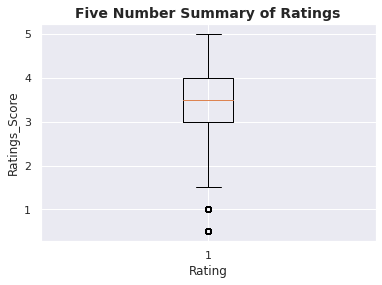

In [18]:
# Check for outliers in the rating column
plt.boxplot(df_train_expl['rating'])
plt.xlabel('Rating')
plt.ylabel('Ratings_Score')
plt.title('Five Number Summary of Ratings', fontweight='bold', fontsize=14)
# plt.savefig('ratings_boxplot.png', format='png')
plt.show()

Ratings 1 nd 0.5 appears to be outliers as shown in the boxplot above. Given that it is possible to rate a movie for 0.5, the 1.0 and o.5 ratings will not be considered outliers. However, given that the lowest rating is 0.5, that should be taken into account in the "rating_scale" when developing the collaborative algorithm. Also, it can be observed that over 75% of the ratings were over average. Implying relatively high viewers stisfaction rate.

Next, generate WordCloud for the the genre, title_cast and plotkeywords to have a better understanding of the preferred genre categories.

In [19]:
# To generate a wordcloud, the field of interest has to be collapsed into a massive text
# Generate list of lists for the fields of interest for the wordcloud
genre_lists = df_train_expl['genres'].to_list()
cast_lists = df_train_expl['title_cast'].to_list()
plots_lists = df_train_expl['plot_keywords'].to_list()

By extracting the fields of interest into a list, the issue of having list of lists arises and this will be problematic for the team when trying to generate text statement. 
To solve this problem, define a function that will flatten the lists into a single list.

In [74]:
# Create a flat lists for each field so as to easily convert to text
# Define a function to automate the process
def flat_list(arr):
    """
    This function takes in a list of lists and flatten the lists to a single list.
    
    Parameter
    ----------
    arr: list
        list of lists - nested list
        
    Returns
    ---------
    list
        A flattened list
    
    """
    flat = []
    try:    
        for item in arr:
            for text in item:
                flat.append(text)
                
    except:
        flat.append(text)
            
    return flat

In [21]:
# Generate text for the wordcloud for each field of interest
genre_text = " ".join(flat_list(genre_lists))
cast_text = " ".join(flat_list(cast_lists))
plot_text = " ".join(flat_list(plots_lists))

Next is to define a function to generate wordcloud for the field text of interest, given that different wordcloud will be generated, the process needs to be automated.

In [73]:
# Define a function to generate Wordcloud since different Wordclouds will be generated
def word_cloud(text, title):
    """
    This function takes in a text and generate wordcloud from the text and also, 
    save the image of the wordcloud
    
    Parameter
    ----------
    text: str
        plain text
        
    title: str
        title of the wordcloud
        
    Returns
    ---------
    WordCloud
    
    """
    
    plt.figure(figsize=(15,15))
    plt.imshow(WordCloud().generate(text), interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=24, fontweight='bold')
#     plt.savefig(f'{title}.png', format='png')
    
    return plt.show()

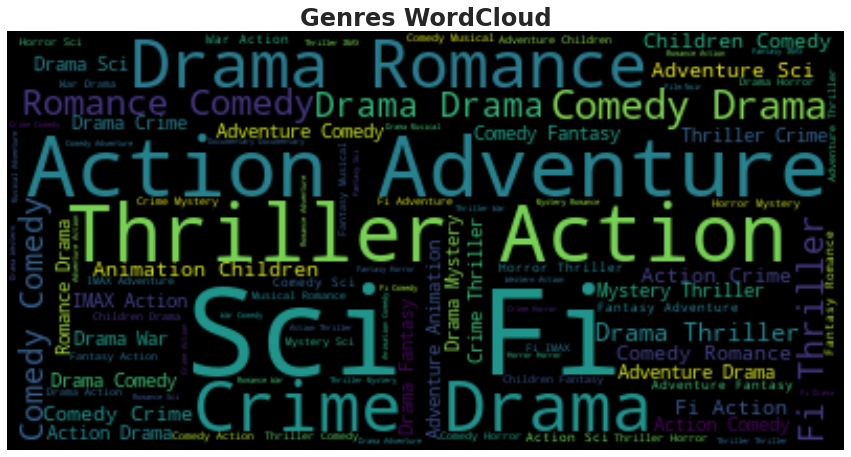

In [23]:
# Generate wordcloud for genre
word_cloud(genre_text, 'Genres WordCloud')

As seen from the wordcloud, the genres watch by most users includes Sci-Fi, Action, Adventure, Thriller, Drama, Crime, Comedy, Romance, Animation children and Mystery. This shows that the genre of a movie influences user preference

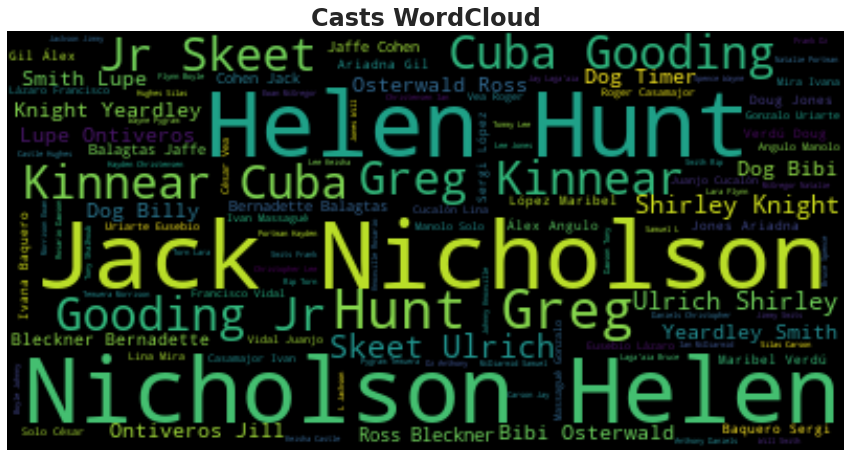

In [24]:
# Generate wordcloud for casts
word_cloud(cast_text, 'Casts WordCloud')

Nicholson Helen, Helen Hunt, Greg Kinnear, Jack Nicholson and Hunt Greg are some of the popular cast whose movies were frequently watched. Also, establishing that the cast have influence on user preference

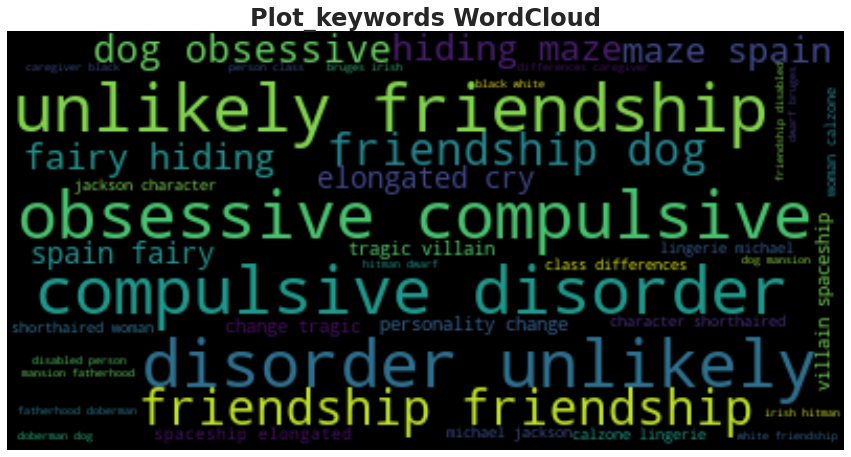

In [25]:
# Generate wordcloud for plots_keywords
word_cloud(plot_text, 'Plot_keywords WordCloud')

Compulsive disorder, Obsessive compulsive, disorder unlikely are some of the popular plot keywords of the movies viewed by the users. The plot keywords also have an impact to the user preference as some plots are more prominent than the others.

Next is to perform analysis using the released tears of the movies.

In [26]:
# Store the release years in a dataframe for further analysis
year_df = df_train_expl[df_train_expl['year'].notna()]

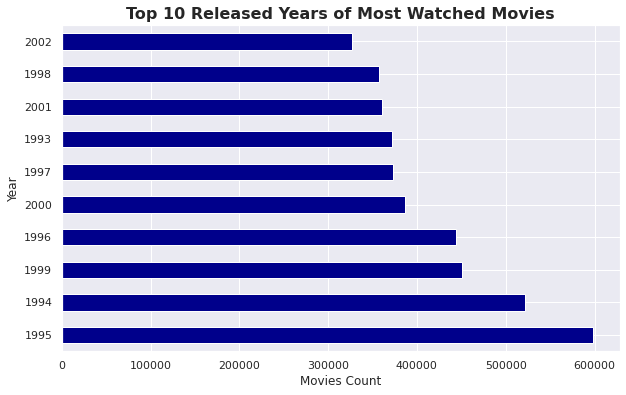

In [27]:
# Get the top 10 released years of most watched movies
year_df['year'].value_counts(ascending=False)[:10].plot(kind='barh', figsize=(10,6), color='darkblue')
plt.xlabel('Movies Count')
plt.ylabel('Year')
plt.title('Top 10 Released Years of Most Watched Movies', fontweight='bold', fontsize=16)
#plt.savefig('top_ten_most_watched_movies.png', format='png')
plt.show()

As seen from the bar chart above, top 4 most movies release years are in the 1990s. This simply shows that, regardless of the release year, some movies are very much relevant and can be watched by a user. This could also mean that most of the viewers of these movies are adults most likely beyond 30yrs of age as it is less likey to have teenagers and young adults watch vintage movies.

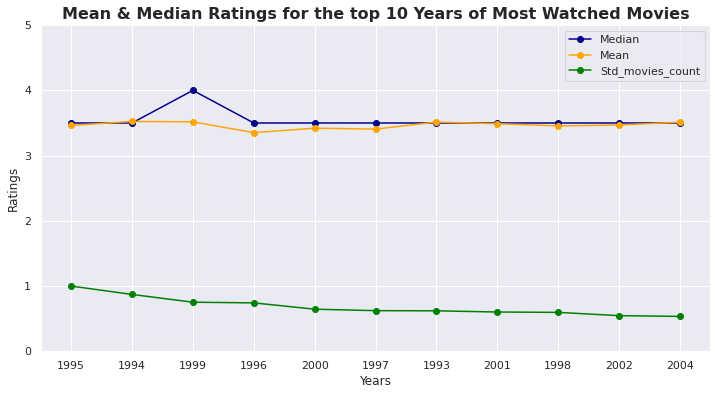

In [28]:
year_df1 = year_df.groupby(['year'])['rating'].agg(['mean','median','count']).reset_index().sort_values(by='count',ascending=False)[:11]
plt.figure(figsize=(12,6))
plt.plot(year_df1['year'],year_df1['median'], marker='o', color='darkblue')
plt.plot(year_df1['year'],year_df1['mean'], marker='o', color='orange')
plt.plot(year_df1['year'],year_df1['count']/year_df1['count'].max(), marker='o', color='green')
plt.ylim((0,5))
plt.legend(['Median', 'Mean', 'Std_movies_count'], loc='upper right')
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Mean & Median Ratings for the top 10 Years of Most Watched Movies', fontweight='bold', fontsize=16)
# plt.savefig('mean_median_ratings.png', format='png')
plt.show()

The average ratings for the movies in the years under consideration is fairly stable, with a slight dip in 1996 average ratings. Also there was a stable median valu across all years except for 1999 where the median value was the highest. The normalized count shows the count of all movies watched in a normalized scale, with 1995 movies having the most views and a 3.5 average rating. The movies count were normalized because of the rating scale, not normalizing the number of views would have offset the chart above with no information about the views displayed.

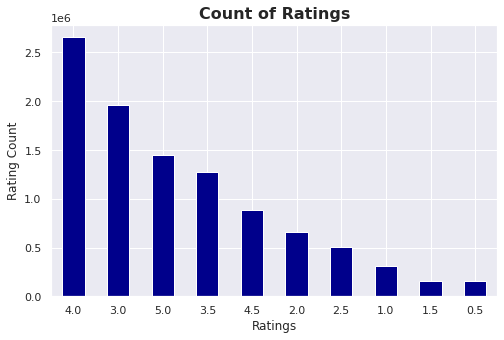

In [29]:
# Visualize the distribution of the ratings
df_train_expl['rating'].value_counts().plot(kind='bar', figsize=(8,5), color='darkblue')
plt.xlabel('Ratings')
plt.ylabel('Rating Count')
plt.xticks(rotation=0)
plt.title('Count of Ratings', fontweight='bold', fontsize=16)
# plt.savefig('rating_distribution.png', format='png')
plt.show()

As observed from the bar chart, most movies in the database were rated high. This implies that many of the viewers actually enjoyed the content of the movies watched.

<a id="five"></a>
## 5. Data Cleaning and Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Given how large some of the data set and the extreme size of the variables dtypes, downcasting should be perform to enhance memory usage.

In [72]:
# Define a downcasting function
def downcast(df):
    """
    This function takes in a DataFrame and loops through each column to check for numeric columns.
    Each numeric column encountered is downcasted to lower size data type, hence reducing memory usage.
    
    Parameter
    ----------
    df: DataFrame
        pandas dataframe with numeric data type features
        
    Returns
    ---------
    Pandas DataFrame
        DataFrame with downcast numeric dtypes
        
    """
    
    for column in df.columns:
        if df[column].dtype == 'float64':
            df[column] = pd.to_numeric(df[column], downcast= 'float')
            
        elif df[column].dtype == 'int64':
            df[column] = pd.to_numeric(df[column], downcast= 'integer')
            
    return df

In [31]:
# Downcast the train data
df_train = downcast(df_train)
# Downcast the movies data
df_movies = downcast(df_movies)
# Downcast the imdb data
df_imdb = downcast(df_imdb)
# Downcast the test data
df_test = downcast(df_test)

In [32]:
# Check the memory consumption of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
dtypes: float32(1), int32(3)
memory usage: 152.6 MB


As seen above, downcasting each DataFrame reduces the meory size of the data by ove 50%.

Some movies in the movie data doe not have a genre. When developing the content-base algorithm, this may confuse the algorithm as movie genre will play an important role in building the content-based filtering algorithm for movie recommendation

In [33]:
# Get the count of movies without genre
len(df_movies[df_movies['genres']=='(no genres listed)'])

5062

Since the number of movies without genre are just 5062 compared to total movie count of ove 62K, dropping movies without genre should not have much impact on the overall dataset

In [34]:
# Filter for movies with genres
df_movies_filt = df_movies[df_movies['genres']!='(no genres listed)']

In [35]:
# Create a movie_master df by merging the Imdb data to the movies data set
df_movie_master = pd.merge(df_movies_filt, df_imdb, on='movieId').drop(['runtime', 'budget'], axis=1)
df_movie_master

,movieId,title,genres,title_cast,director,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
24645,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,Konstantin Graudus|Gustav Adolph Artz|Jürgen K...,Jörg Wagner,safety|forklift|spoof|blood
24646,131254,Kein Bund für's Leben (2007),Comedy,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,man wrapped in a towel|man wears a thong|male ...
24647,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,ski|ski resort|ampersand in title|drink in title
24648,131258,The Pirates (2014),Adventure,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,pirate|sword fight|korea|bandit


In [36]:
# Replace NaN in the plotkeywords variable with empty strings to avoid errors when splitting the plots
df_movie_master[['title_cast','plot_keywords']] = df_movie_master[['title_cast','plot_keywords']].fillna('')
df_movie_master

,movieId,title,genres,title_cast,director,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
24645,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,Konstantin Graudus|Gustav Adolph Artz|Jürgen K...,Jörg Wagner,safety|forklift|spoof|blood
24646,131254,Kein Bund für's Leben (2007),Comedy,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,man wrapped in a towel|man wears a thong|male ...
24647,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,ski|ski resort|ampersand in title|drink in title
24648,131258,The Pirates (2014),Adventure,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,pirate|sword fight|korea|bandit


For the content-based algorithm, essential features common among movies needs to be combined and vectorized. In order to achieve this, some features have to be combined appropriately.

- First the columns of interest with each keyword has to be on a list for easy combination
- Create a new column by combining the columns of interest into the engineered feature(This will be done in the feature engineering section)

In [37]:
# # Group the plotkeywords into a list using the split method
df_movie_master['plot_keywords'] = df_movie_master['plot_keywords'].apply(lambda x: x.split('|'))

In [38]:
# Group the title_cast into a list using the split method
df_movie_master['title_cast'] = df_movie_master['title_cast'].apply(lambda x: x.split('|'))

In [39]:
# # Group the plotkeywords into a list using the split method
df_movie_master['genres'] = df_movie_master['genres'].apply(lambda x: x.split('|'))

In [40]:
# View the top content of the movie_master df for the content-based algorithm
df_movie_master

,movieId,title,genres,title_cast,director,plot_keywords
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[toy, rivalry, cowboy, cgi animation]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,"[board game, adventurer, fight, game]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,"[boat, lake, neighbor, rivalry]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,"[black american, husband wife relationship, be..."
4,5,Father of the Bride Part II (1995),[Comedy],"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,"[fatherhood, doberman, dog, mansion]"
...,...,...,...,...,...,...
24645,131252,Forklift Driver Klaus: The First Day on the Jo...,"[Comedy, Horror]","[Konstantin Graudus, Gustav Adolph Artz, Jürge...",Jörg Wagner,"[safety, forklift, spoof, blood]"
24646,131254,Kein Bund für's Leben (2007),[Comedy],"[Franz Dinda, Florian Lukas, Axel Stein, Kaila...",Carsten Funke,"[man wrapped in a towel, man wears a thong, ma..."
24647,131256,"Feuer, Eis & Dosenbier (2002)",[Comedy],"[Rick Kavanian, Axel Stein, Eva Habermann, Chr...",Matthias Dinter,"[ski, ski resort, ampersand in title, drink in..."
24648,131258,The Pirates (2014),[Adventure],"[Nam-gil Kim, Ye-jin Son, Hae-Jin Yoo, Kyeong-...",Seong-il Cheon,"[pirate, sword fight, korea, bandit]"



For the collaborative-based algorithm, three main columns are needed to generate predictions.
- UserId
- MovieId
- Ratings

For the purpose of recommendation, title column would be added.

In [41]:
# Create a user_master DataFrame including the train and movies dataframe features
df_user_master = pd.merge(df_train, df_movies, on='movieId').drop(['timestamp', 'genres'], axis=1)

Merging the train and movies datasets will enable access to the movie title watched by each user. This could be helpful if the team or the project requires using movie title as item ID in the model development.

In [42]:
# View top 5 content of the user master dataframe
df_user_master.head()

,userId,movieId,rating,title
0,5163,57669,4.0,In Bruges (2008)
1,87388,57669,3.5,In Bruges (2008)
2,137050,57669,4.0,In Bruges (2008)
3,120490,57669,4.5,In Bruges (2008)
4,50616,57669,4.5,In Bruges (2008)


<a id="six"></a>
## 6. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, the team will engineer features necessary for model development. The feature engineering/selection will be in two categories.

- Feature selection will be performed for the collaborative-based filtering since only three key columns are required
- Feature engineering will be perfomed for the content-based. As seen from the EDA section, movie genre, casts, director and plot keywords play important roles in influencing a user preference in movies.

##### Feature selection for collaborative-based filtering algorithm.

For the collaborative-based algorithm, three main columns are needed to generate predictions.
- UserId
- MovieId
- Ratings

In [43]:
# Select features of interest for the intended model
df_prep_colab = df_user_master[['userId', 'movieId', 'rating']]

##### Feature Engineering for content-based filtering

As observed from the EDA, features such as movie genres, casts/crew, director and plot keywords all influence viewers preference for a movie hence, these features should form the attributes of the movies for the content-based filtering.

However, due to memory constraint, the team will use only the genre features as the tag attribute for the content-based filtering algorithm development.

In [44]:
# Create a new features using genres and title_cast variables
df_movie_master['tags'] = df_movie_master['genres']

In [45]:
df_prep_cont = df_movie_master[['movieId', 'title', 'tags']]
df_prep_cont

,movieId,title,tags
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
24645,131252,Forklift Driver Klaus: The First Day on the Jo...,"[Comedy, Horror]"
24646,131254,Kein Bund für's Leben (2007),[Comedy]
24647,131256,"Feuer, Eis & Dosenbier (2002)",[Comedy]
24648,131258,The Pirates (2014),[Adventure]


In [46]:
# Convert the tags values to string.
df_prep_cont['tags'] = df_prep_cont['tags'].apply(lambda x: ' '.join(x))

In [47]:
# Convert the tags features to format understandable by the model by using Tfidf vectorizer
vect = TfidfVectorizer(stop_words='english', lowercase=True, strip_accents='ascii')

In [48]:
# Store the vectorzed array into a variable for future referencing
X_train = vect.fit_transform(df_prep_cont['tags']).toarray()
X_train.shape

(24650, 21)

<a id="seven"></a>
## 7. Model Development
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section, the team will be building models capable of making movie recommendations to users and also predict the ratings a user will rate a movie given the similarities among users and movies attributes.

Two algorithmic approach will be used for the model development
- Content-based filtering
- Collaborative-based filtering

### Content-based Filtering

The intuition behind content based recommendation system is that, if a user liked a particular movie, then that user might like movies that are similar to the liked movie. To achieve this, the algorithm uses attributes such as genre, cast, director, descriptions e.t.c. to compute for similarities among movies.

##### How it works

<br></br>

<div align="center" style="width: 800px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Content_filtering.jpg"
     alt="Content-based Filtering"
     style="float: center; padding-bottom=0.5em"
     width=800px/>
A depiction of the decision process used to recommend items within content-based filtering algorithms.  
</div>
<br></br>
Basically, items similar to what the user has watched before is being recommended to the user. One of the shortcomming of content-based algorithm is that the recommender recommends simialar content to the user.

Similarity measure is a measure of how data samples are related or close to each other. Movies with high similarity scores are recommended to the user.
There are several types of similarity measure some of which are:

- Eucledian distance: This measures the distance between two points. The smaller the distance, the higher the similarity between the two points. Often prefeered when the data is dense and continuous. The pythagorean theorem gives the distance between the two points.
- Manhattan distance: This measures the distance between two points as the sum of the absolute differences in their cartesian coordinates. Manhattan metric measures the similarity between points.
- Minkowski distance: The minkowski distance is a generalized form of the eucledian distance and the manhattan distance. It is the distance between observations in n-D space.
- Cosine similarity: The cosine similarity metrics finds the normalized dot product of two attributes. This is done by calculating the cosine of the angles between the two objects. Cosine similarity is paricularly used in positive space where the outcome is neatly bound in [0,1]. The cosine of 0 is 1 and it is less than 1 for all other angles. The cosine similarity metric is widely used in text mining, natural language processing and information retrieval system. It is also efficient to evaluate especially for sparsed vectors.
- Jaccard similarity: Jaccard similarity measures the similarity between finite sample sets. It s the cardinality of the intersection of the sets divided by the cardinality of the union of the sample sets.

For the purpose of this project, the cosine similarity metric will be used as it is the most suitable metric for the movie recommendation system, given that natural language processing, sparse vectors and similarity between vectors will all be used in this project.

##### Generate movie recommendations using the content-based algorithm

In [49]:
# Get the indices of each movie title for recommendation reference
titles = df_prep_cont['title']
indices_rec = pd.Series(df_prep_cont.index, index=df_prep_cont.title)
indices_pred = pd.Series(df_prep_cont.index, index=df_prep_cont.movieId)

In [50]:
# Calculate the cosine similarity for each movie
cos_sim = cosine_similarity(X_train, X_train)

In [51]:
# Define a function to generate top N recommended movies
def content_generate_top_N_recommendations(movie_title, N):
    """
    This function takes in movie title and N number of movie recommendation required as input.
    
    Parameter
    ----------
    movie_title: str
        A MovieLens movie title
        
    N: int
        Positive integer values
        
    Returns
    ---------
    list
        N number of movie titles
    
    """
    # Convert the string movie title to a numeric index for the 
    # similarity matrix
    m_idx = indices_rec[movie_title]
    # Extract all similarity values computed with the reference movie title
    sim_scores = list(enumerate(cos_sim[m_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N + 1]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [52]:
# Generate top N recommeded movies
content_generate_top_N_recommendations('Toy Story (1995)', 10)

2202                                           Antz (1998)
3020                                    Toy Story 2 (1999)
3652        Adventures of Rocky and Bullwinkle, The (2000)
3911                      Emperor's New Groove, The (2000)
4779                                 Monsters, Inc. (2001)
9937     DuckTales: The Movie - Treasure of the Lost La...
10755                                     Wild, The (2006)
11581                               Shrek the Third (2007)
12938                       Tale of Despereaux, The (2008)
17321    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object

##### Generate Predictions using content-based algorithm

In [53]:
# Create a function that takes in a movieID and userID and return prediction on the rating the user will give to that movie
def content_generate_movie_rating(movie_id, user, rating_data, k=20, threshold=0.0):
    """
    This function takes in the userId and movieId of a user and a dataframe respectively, and then return a prediction on the ratings the user 
    will give to that movie.
    
    Parameter
    ----------
    movie_id: int
        A MovieLens movie ID
        
    user: int
        A MovieLens user ID
        
    rating_data: DataFrame
        A MovieLens DataFrame with userId, movieId and ratings for each user and movies
        
    Returns
    ---------
    float
        Predicted ratings score
    
    """
    # Convert the book title to a numeric index for our 
    # similarity matrix
    m_idx = indices_pred[movie_id]
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['userId']==user].iterrows():
        sim = cos_sim[m_idx-1, indices_pred[row['movieId']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['movieId']==movie_id]['rating'])
    return predictedRating

In [54]:
# Obtain the list of both user and item IDs for easy iteration
user_id = list(df_test['userId'])
movie_id = list(df_test['movieId'])

In [57]:
# Write a function that generates predictions using the content-based filtering

def predict_ratings(userId, movieId):
    """
    This function takes in a range of userId and movieId of a user and a movie respectively, and then return a prediction on the ratings the user 
    will give to that movie.
    
    Parameter
    ----------
    movie_id: array or list
        A MovieLens movie ID
        
    user: array or list
        A MovieLens user ID
        
    Returns
    ---------
    list of floats
        Predicted ratings scores
    
    """
    
    predictions = []
    
    for i in range(len(userId)):
        predictions.append(content_generate_movie_rating(movie_id= movieId[i],user=userId[i], rating_data= df_user_master).round(1))
        
    return predictions

Given that cosine similarity was computed for roughly 26k of the movie dataset out of the entire 62k, trying to generate predictions for movieId beyond that index will raise a keyerror message. For demonstration purpose, the team will only generate predictions for the first 20 movies and users.

In [58]:
# Generate predicions for the first 20 movieIds and userIds
predictions = predict_ratings(user_id[:20], movie_id[:20])

In [59]:
# View the content of the predictions
predictions[:5]

[3.8, 3.5, 3.6, 4.1, 4.0]

### Collaborative-based Filtering


Collaborative based recommendation system matches users of the same interest and gives recommendation based on their reactions and likes. This reaction can be implicit (viewing a movie, adding it to a wishlist) or explicit (by rating the movies).

It works by searching a large group of people and finding a smaller set of users with similar taste to a particular user. It then looks at the item they like and combine them to create a ranked list of suggestions.

#### How it works

<br></br>

<div align="center" style="width: 700px; font-size: 80%; text-align: center; margin-left: 80px">
<img src="https://vitalflux.com/wp-content/uploads/2022/08/collaborative-filtering-recommender-system.png"
     alt="Collaborative-based Filtering - Utility Matrix"
     style="float: center; padding-bottom=0.5em"
     width=500px/> 
</div>

<br></br>
Implementation of collaborative based recommendation system is of two types:

- Memory-based: This approach uses the entire user-item dataset to generate a recommendation using statistical techniques such as cosine similarity, pearson correlation, eucledian distance e.t.c. Memory based are computationaly expensive.
- Model-based: This approach involves a step to reduce or compress large but sparse user-item matrix by using matrix factorization.

For the purpose of this project, the team will be implementing collaborative filtering using Model-based approach given the computational cost of the memory-based type and the limitations of computer memory.

All algorithms for collaborative-based filtering will be implemented using Scikit-Surprise.

#### Matrix Factorization-Based Algorithm

According to [realpython](https://realpython.com/build-recommendation-engine-collaborative-filtering/) Matrix factorization simply means breaking down a large matrix into a product of smaller ones. This is similar to factorization of integers. In the case of a matrix, a matrix **A** with dimensions m x n can be broken down into matrices **X** and **Y** with dimensions m x p and p x n respectively.

The reduced matrix actually represent the users and items respectively.
The m rows in the first matrix represent the m users, and the p columns tell you about the features or characteristics of the users. The same goes for the item matrix with n items and p characteristics. Here’s an example of how matrix factorization looks:

<br></br>

<div align="center" style="width: 700px; font-size: 80%; text-align: center; margin-left: 80px">
<img src="https://files.realpython.com/media/dimensionality-reduction.f8686dd52b9c.jpg"
     alt="Collaborative-based Filtering - Utility Matrix"
     style="float: center; padding-bottom=0.5em"
     width=400px/>
</div>

In the image above, the matrix is reduced into two matrices. The one on the left is the user matrix with m users, and the one on top is the item matrix with n items. The rating 4 is reduced or factorized into:

- A user vector (2, -1)
- An item vector (2.5, 1)

The two columns in the user matrix and the two rows in the row matrix are called the latent factors and are the indication of hidden characteristics about the users and items.

There are algorithms for Matrx Factorization which will be used to generate rating predictions.

#### Scikit Surprise

Surprise is a Python scikit for building and analyzing recommender systems that deals with explicit rating data. It comes with various recommender algorithms and similarity metrics that makes it easy to build and analyze recommenders.

All agorithms for the collaborative-based filtering for this project will be implemented using scikit-surprise.

To use surprise, the knowledge of the following basic modules and classes is required:

- Dataset: The Dataset module is used to load data from files, Pandas dataframes, or even built-in datasets available for experimentation.
- Reader: The Reader class is used to parse a file containing ratings.

To build a recommender system using surprise, the Surprise Dataset must have the following fields:

- The UserID
- The ItemID
- The corresponding Ratings

#### Prepare the Surprise Dataset

In [63]:
# Define the Reader rating_scale
reader = Reader(rating_scale=(0.5, 5))

In [64]:
# Load data from pandas dataframe using the load_from_df method
data = Dataset.load_from_df(df_prep_colab[['userId', 'movieId', 'rating']], reader)

In [65]:
# Split the data into trainset and testset in the ratio 80 : 20 using the train_test_split from surprise
trainset, testset = train_test_split(data, test_size=0.2)

In [66]:
# Build the full dataset for final training before generating predictions
full_trainset = data.build_full_trainset()

#### SVD Model

Singular Value Decomposition(SVD) is a Matrix Factorization algorithm.

In [68]:
# Instantiate the SVD algorithm
algo = SVD(n_factors=35, n_epochs=24)

In [69]:
# Train the trainset data
algo.fit(trainset)

In [70]:
# Generate predictions for the validationset
pred = algo.test(testset)

##### Calculate Metrics

In [60]:
# Define a function to calculate the metrics
def metrics(test_pred):
    """
    This function takes in the userId and movieId of a user and a movie respectively, and then return a prediction on the ratings the user 
    will give to that movie.
    
    Parameter
    ----------
    validationset predictions: array
        Array of predictions
        
    Returns
    ---------
    float
        Predicted ratings score
    
    """
    
    rmse = np.round(accuracy.rmse(test_pred), 2)
    mae = np.round(accuracy.mse(test_pred), 2)
    
    return {'RMSE': rmse, 'MAE': mae}

In [72]:
# Evaluate the model and get the metrics for SVD model
metrics_svd = metrics(pred)

RMSE: 0.8278
MSE: 0.6852


In [74]:
# Get the parameters for the SVD algorithm
params_svd = {
                'n_factors': 35,
                'n_epochs': 24
}

##### Make Kaggle Submission

Given that many kaggle submissions will be made, here, the team will create a function to automate the generation of kaggle submission file.

In [76]:
# Write a function that generates predictions for the trained model

def predict_ratings(userId, movieId):
    """
    This function takes in a range of userId and movieId of a user and a movie respectively, and then return a prediction on the 
    ratings the user will give to that movie.
    
    Parameter
    ----------
    movie_id: array or list
        A MovieLens movie ID
        
    user: array or list
        A MovieLens user ID
        
    Returns
    ---------
    list of floats
        Predicted ratings scores
    
    """
    
    predictions = []
    
    for i in range(len(userId)):
        predictions.append(algo.predict(userId[i], movieId[i]).est)
        
    return predictions

In [76]:
# Obtain the list of both user and item IDs for easy iteration
user_id = list(df_test['userId'])
movie_id = list(df_test['movieId'])

In [77]:
# Train the full dataset for better performance in the test data predictions
algo.fit(full_trainset)

In [78]:
# Generate the predictions for kaggle competition
predictions = predict_ratings(user_id, movie_id)

In [77]:
# Crate a function to generate kaggle submission file

def subfile(predictions, filename):
    """
    This function takes in a range of predictions generate and a filename to return a .csv file that can be submitted on kaggle
    
    Parameter
    ----------
    predictions: array or list
        Generated predictions
        
    filename: str
        name of the output file
        
    Returns
    ---------
    DataFrame
        DataFrame with two fields, Id and ratings
    
    """
    
    pred_df = pd.DataFrame(predictions, columns=['rating'])
    sub = df_test.copy()
    sub['userId'] = sub['userId'].astype(str)
    sub['movieId'] = sub['movieId'].astype(str)
    sub['Id'] = sub[['userId', 'movieId']].apply("_".join, axis=1)
    sub = sub[['Id']]
    sub = sub.join(pred_df)
    sub = downcast(sub)
    sub.to_csv(filename + '.csv', index=False)

In [80]:
# Generate a kaggle submission file
subfile(predictions, 'svd-scale_min0.55')

In [81]:
# Log metrics and parameters to commet
experiment.log_parameters(params_svd)
experiment.log_metrics(metrics_svd)

In [82]:
# Terminate connection with comet
experiment.end()

#### CoCluster Model

Cocluster algorithm is a collaborative filtering algorithm based on co-clustering.


Basically, users and items are assigned some clusters and some co-clusters The key idea is to simultaneously obtain user and item neighborhoods via coclustering and generate predictions based on the average ratings of the co-clusters (user-item neighborhoods) while taking into account the individual biases of the users and items.

In [61]:
# Instantiate the Co-clustering algorithm
algo = CoClustering(n_cltr_u=5, n_cltr_i=5, random_state=365)

In [67]:
# # Train the training set of the data
algo.fit(trainset)

In [86]:
# Generate predictions for the validation set
pred = algo.test(testset)

#### Calculate Metrics

In [87]:
# Evaluate the model and get the metrics for Cocluster model
metrics_cocluster = metrics(pred)

RMSE: 0.8967
MSE: 0.8040


In [88]:
# Get the parameters for the algorithm
params_cocluster = {
                'random_state': 365,
                'n_epochs': 20,
                'n_cltr_u': 5,
                'n_cltr_i': 5
}

##### Make Kaggle Submission

In [68]:
# Train the entire dataset
algo.fit(full_trainset)

In [90]:
# Generate predictions for kaggle submission
predictions = predict_ratings(user_id, movie_id)

In [91]:
# Generate a kaggle submission file
subfile(predictions, 'cocluster-sub1')

##### Log Parameters to Comet

In [92]:
# Log metrics and parameters to commet
experiment.log_parameters(params_cocluster)
experiment.log_metrics(metrics_cocluster)

In [93]:
# Terminate connection with comet
experiment.end()

#### Non-Negative Matrix Factorization(NMF) Model


A collaborative filtering algorithm based on Non-negative Matrix Factorization.

This algorithm is very similar to SVD. It is a low-rank approximation method where both the data and the estimated low-rank factors are constrained to be nonnegative.

In [94]:
# Instantiate the MNF algorithm
algo = NMF()

In [95]:
# Train the training set of the data
algo.fit(trainset)

In [96]:
# Generate predictions for the validation set
pred = algo.test(testset)

#### Calculate Metrics

In [97]:
# Evaluate the model and get the metrics for NMF model
metrics_nmf = metrics(pred)

RMSE: 0.8838
MSE: 0.7812


In [98]:
# Get the parameters for the algorithm
params_nmf = {
                'n_factors': 15,
                'n_epochs': 50
}

#### Make Kaggle Submission

In [99]:
# Train the entire dataset
algo.fit(full_trainset)

In [100]:
# Generate predictions for kaggle submission
predictions = predict_ratings(user_id, movie_id)

In [101]:
# Generate a kaggle submission file
subfile(predictions, 'nmf-sub2')

#### Log Parameters to Comet

In [103]:
# Log metrics and parameters to commet
experiment.log_parameters(params_nmf)
experiment.log_metrics(metrics_nmf)

In [104]:
experiment.end()

<a id="eight"></a>
## 8. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, the team will discuss on each model performance with respect to the performance metrics used to evaluate the developed model.

The performance metric for this model development are majorly
- Root Mean Squared Error(RMSE)
- Mean Absolute Error(MAE)

<br></br>
<div align="center" style="width: 700px; font-size: 80%; text-align: center; margin-left: 80px">
<img src="https://www.reneshbedre.com/assets/posts/reg/reg_front.svg"
     alt="Collaborative-based Filtering - Utility Matrix"
     style="float: center; padding-bottom=0.5em"
     width=400px/>
</div>
<br></br>

**Root Mean Square Error (RMSE)** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
The rating is continuos and hence its prediction is regression based. The RMSE can be calculated by taking the square root of Mean-Squared-Error(MSE). The MSE is calculated as the sum of the squared differences between the actual value and the predicted value divided by the total number of observations.

**Mean Squared Error:**

$$MSE = \frac{RSS}{n}$$   
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$ 

**Mean Absolute Error (MAE)** is the average of the absolute errors.
Absolute Error is the absolute difference between the predicted value and “true” value.

$$MAE = \frac{1}{n}\sum_{i=1}^n|y_i-\hat{y}_i|$$ 

In [111]:
# Place all model metrics in a dataframe for easy comparison
model_metrics = pd.DataFrame([metrics_svd,metrics_cocluster, metrics_nmf], 
                             index=[['SVD','Cocluster', 'NMF']])

In [112]:
# Compare model performance
model_metrics = model_metrics.reset_index().rename(columns={'level_0': 'Model'})
model_metrics

,Model,RMSE,MAE
0,SVD,0.83,0.68
1,Cocluster,0.89,0.80
2,NMF,0.88,0.78


In [114]:
# Define a function that plots the performance metrics on a bar chart for comparative analyis
def plot_metrics(metric):
    
    model_metrics.sort_values(by=metric).plot(kind='barh',y = metric, x='Model', figsize=(10,6), legend=None, color='darkblue')
    plt.xlabel(metric, fontsize=14)
    plt.ylabel('Model', fontsize=14)
    plt.title(metric + ' Score for each Model', fontsize=16, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.savefig(f'{metric}.png', format='png')
    
    return plt.show()

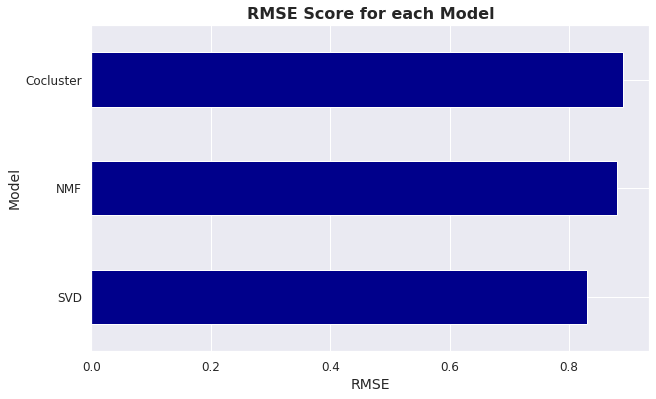

In [115]:
# Compare RMSE for all models
plot_metrics('RMSE')

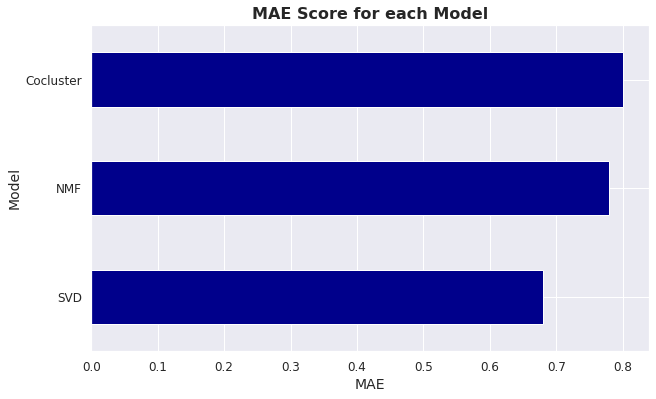

In [116]:
# Compare MAE for all models
plot_metrics('MAE')

Having explained the different performance metrics above, it can be concluded that the lower the metric score, the better the model. With this understanding, it is clear that the SVD is the best performing model based on the metrics above. With an RMSE of 0.83 and a Mean Absolute Error of 0.68

<a id="nine"></a>
## 9. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, the team will be providing a more detailed explanantion about how the best performing model(SVD) works only.

### Singular Value Decomposition (SVD)


The Singular Value Decomposition (SVD) is a matrix factorization algorithm. It involves the factorization of a matrix into three matrices.

<br></br>

<div align="center" style="width: 700px; font-size: 80%; text-align: center; margin-left: 80px">
<img src="https://miro.medium.com/max/640/1*F-PAQjORuPLU6iRSDsNbvQ@2x.webp"
     alt="Rotation Matrix"
     style="float: center; padding-bottom=0.5em"
     width=150px/>
</div>
<br></br>

<div align="center" style="width: 700px; font-size: 80%; text-align: center; margin-left: 80px">
<img src="https://miro.medium.com/max/542/1*CdAvPkNyzRTzf4elJq1Jqw@2x.webp"
     alt="Rotation Matrix"
     style="float: center; padding-bottom=0.5em"
     width=100px/>
</div>

To understand SVD we need to first understand the Eigenvalue Decomposition of a matrix. A matrix A is a transformation that acts on a vector x by multiplication to produce a new vector Ax. A vector is a quantity which has both magnitude and direction. The general effect of matrix A on the vectors in x is a combination of rotation(A) and stretching(B). That is, it changes both the direction and magnitude of the vector with a constraint that the transformation must be linear.

SVD simplifies data, remove noise and improve algorithm results. Also, SVD is computationally fast, cheap and memory efficient since it is a model based algorithm and not memory based algorithm.

<a id='ten'></a>
## 10. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

From the anlysis and model development, the following conclusions and achievements can be reported:

- Over 75% of the movie  ratings are above average. This means high satisfaction rate for most movies in the database and this means variety in movie recommendation to both old and new users.
- The number of movies produced over the years have increased tremendously and this will make it difficult for a user to keep track of all movies to watch, the recommender system solves this problem for the user as different movies are recommended with respect to the user's taste and preferences regardles of the user's prior knowledge to the movie title.
- A machine learning model with an RMSE of 0.83 and MAE of 0.69 was developed using Singular Value Decomposition (SVD)
- The developed model was successfuly integrated into a web application which was built using streamlit.
- The web application is supper fast wit a latency < 2 secs for both content-based and collaborative-based filtering in a memory constraint machine. This latency is not dependent of the size of the data as the web application was designed to only filter for what is needed for recommendation, rather than computing for the entire dataset.
- Due to the low latency which also do not increase with increae in data, the computational cost of the web application is minimized without the need to pay for higher computational power, thereby, making the web application cost effective.

With all the highlights above, the product developed by the team is scalable, cost effective with high predictive power and most importantly, recommendations are generated in less than 2 secs, reducing customer's waiting time while increasing engagement with the platform. 

## Resources

[Content-Based Recommendation system](https://medium.com/web-mining-is688-spring-2021/content-based-movie-recommendation-system-72f122641eab#:~:text=Content%20Based%20Recommendation%20System%3A%20It,a%20show%20similar%20to%20it.)

[Similarity Measure - dataaspirant](https://dataaspirant.com/five-most-popular-similarity-measures-implementation-in-python/)

[Similarity Measure - towardsdatascience](https://towardsdatascience.com/17-types-of-similarity-and-dissimilarity-measures-used-in-data-science-3eb914d2681)

[Collaborative-Base Recommendation System](https://realpython.com/build-recommendation-engine-collaborative-filtering/)

[Scikit-Surprise docs](https://surprise.readthedocs.io/en/stable/index.html)

[RMSE & MAE](https://www.statisticshowto.com/)

[SVD](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d)